In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
df = pd.read_excel('Book1.xlsx')

In [3]:
df.head(10)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
5,1,Medium,2,5,2,2,34.67
6,1,Medium,2,5,2,3,27.98
7,1,Medium,2,5,2,4,27.72
8,1,Medium,3,12,1,1,44.54
9,1,Medium,3,12,1,2,37.94


In [4]:
aa = df[df['MarketSize']== 'Medium']['SalesInThousands'].sum()
aa

14075.310000000001

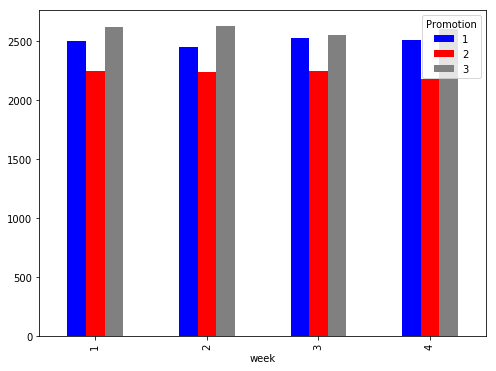

In [5]:
best_sales_performing = df.groupby(['Promotion','week'])['SalesInThousands'].sum().unstack('Promotion').plot(kind = 'bar',
                                              figsize=(8,6), color = ('blue','red','grey'))
#plt.xlabel('Age Group')
#fy = f.groupby(['week'])['SalesInThousands'].sum().plot.bar()
#fy
#ax1 = plt.subplot(1,2,1)
#x_values = range(len(week))
#plt.plot(x_values,visits_per_month, marker="o")
#sales_perf_df = pd.DataFrame(best_sales_performing)
#a = sales_perf_df.groupby(['Promotion'])['SalesInThousands'].sum()#.apply(lambda x: x/x.sum() * 100)
#a = a/a.sum()*100#.apply(lambda x: x/x.sum() * 100)
#a


In [6]:
best_sales_performing_df = pd.DataFrame(df.groupby(['Promotion','week'])['SalesInThousands'].sum()).reset_index()
#best_sales_performing_df1 = best_sales_performing_df.groupby(['Promotion'])['SalesInThousands'].sum()
best_sales_performing_df

,Promotion,week,SalesInThousands
0,1,1,2504.51
1,1,2,2447.97
2,1,3,2527.32
3,1,4,2513.23
4,2,1,2243.32
5,2,2,2236.38
6,2,3,2242.94
7,2,4,2175.29
8,3,1,2621.48
9,3,2,2629.61


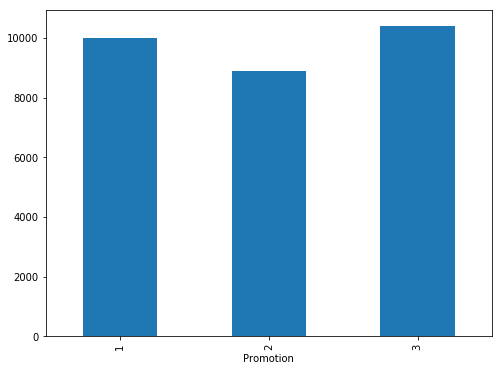

In [7]:
best_sales_performing = df.groupby('Promotion')['SalesInThousands'].sum().plot(kind = 'bar',
                                              figsize=(8,6))

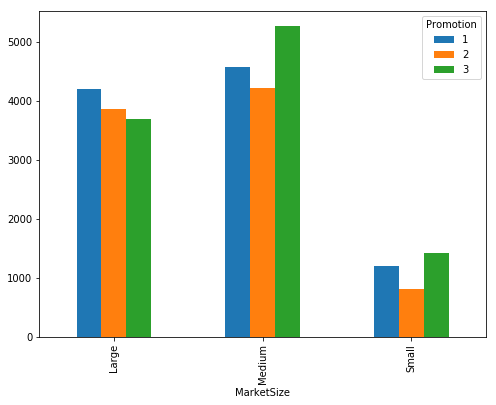

In [8]:
e = df.groupby(['Promotion','MarketSize'])['SalesInThousands'].sum().unstack('Promotion').plot(kind = 'bar',
                                              figsize=(8,6))

#datatoexcel = pd.ExcelWriter("prova.xlsx", engine='xlsxwriter')

#data.to_excel(datatoexcel, sheet_name="Sheet1")

#datatoexcel.save()

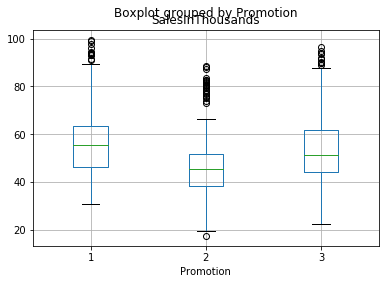

In [9]:
df.boxplot("SalesInThousands", by='Promotion')

In [10]:
df['Promotion'] = df['Promotion'].astype('category')

In [11]:
mod = ols('SalesInThousands ~ Promotion',data=df).fit()

In [12]:
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
Promotion,11449.174291,2.0,21.953486,6.765849e-10
Residual,142114.105414,545.0,NaN,NaN


In [13]:
#checking significance
6.765849e-10 < 0.5

True